In [78]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('train.csv')

In [3]:
df1

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,Id_3lxfvtmbkr,2023-02-13,4,wage employed,273.0,Rural,Limpopo,1.0,0.0,0.0,...,NaN,40 - 49 %,50 - 59 %,NaN,NaN,1,1,2000,1,0
4016,Id_u3uc3v9pts,2023-02-02,4,unemployed,401.0,Urban,Gauteng,1.0,0.0,1.0,...,NaN,40 - 49 %,60 - 69 %,NaN,NaN,0,1,1999,3,0
4017,Id_enkksj5q5r,2023-03-20,4,unemployed,2287.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,1,1991,10,0
4018,Id_3rtpd7kc1g,2022-03-15,2,studying,NaN,Urban,Eastern Cape,1.0,NaN,NaN,...,40 - 49 %,NaN,60 - 69 %,NaN,50 - 59 %,1,1,2000,1,1


In [4]:
df1['Survey_date'] = pd.to_datetime(df1['Survey_date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Person_id        4020 non-null   object        
 1   Survey_date      4020 non-null   datetime64[ns]
 2   Round            4020 non-null   int64         
 3   Status           4020 non-null   object        
 4   Tenure           2626 non-null   float64       
 5   Geography        4020 non-null   object        
 6   Province         4020 non-null   object        
 7   Matric           3012 non-null   float64       
 8   Degree           2189 non-null   float64       
 9   Diploma          2211 non-null   float64       
 10  Schoolquintile   2359 non-null   float64       
 11  Math             997 non-null    object        
 12  Mathlit          1353 non-null   object        
 13  Additional_lang  2018 non-null   object        
 14  Home_lang        381 non-null    object 

In [5]:
df1['Status']= df1['Status'].astype('category')
df1['Geography']= df1['Geography'].astype('category')
df1['Province']= df1['Province'].astype('category')
df1['Matric']= df1['Matric'].astype('category')
df1['Degree']= df1['Degree'].astype('category')
df1['Diploma']= df1['Diploma'].astype('category')
df1['Schoolquintile']= df1['Schoolquintile'].astype('Int64')
df1['Female']= df1['Female'].astype('category')
df1['Tenure']= df1['Tenure'].astype('Int64')
df1['Math']= df1['Math'].astype('category')
df1['Mathlit']= df1['Mathlit'].astype('category')
df1['Additional_lang']= df1['Additional_lang'].astype('category')
df1['Home_lang']= df1['Home_lang'].astype('category')
df1['Science']= df1['Science'].astype('category')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Person_id        4020 non-null   object        
 1   Survey_date      4020 non-null   datetime64[ns]
 2   Round            4020 non-null   int64         
 3   Status           4020 non-null   category      
 4   Tenure           2626 non-null   Int64         
 5   Geography        4020 non-null   category      
 6   Province         4020 non-null   category      
 7   Matric           3012 non-null   category      
 8   Degree           2189 non-null   category      
 9   Diploma          2211 non-null   category      
 10  Schoolquintile   2359 non-null   Int64         
 11  Math             997 non-null    category      
 12  Mathlit          1353 non-null   category      
 13  Additional_lang  2018 non-null   category      
 14  Home_lang        381 non-null    categor

In [7]:
df1.rename(columns = {'Female':'Gender'}, inplace=True)

In [8]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Survey_date,4020,2022-09-16 09:28:07.164178944,2021-08-11 00:00:00,2022-03-14 00:00:00,2022-09-03 00:00:00,2023-02-21 00:00:00,2023-03-27 00:00:00,NaN
Round,4020.0,3.129851,1.0,2.0,3.0,4.0,4.0,0.978014
Tenure,2626.0,582.883092,0.0,95.0,395.0,819.0,3560.0,621.220657
Schoolquintile,2359.0,2.696482,0.0,2.0,3.0,4.0,5.0,1.318409
Sa_citizen,4020.0,0.999502,0.0,1.0,1.0,1.0,1.0,0.022302
Birthyear,4020.0,1997.462935,1972.0,1995.0,1999.0,2000.0,2004.0,4.378334
Birthmonth,4020.0,5.34403,1.0,1.0,5.0,9.0,12.0,3.805916
Target,4020.0,0.271891,0.0,0.0,0.0,1.0,1.0,0.444989


In [9]:
df1.shape

(4020, 21)

In [10]:
df1.isna().sum()

Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure             1394
Geography             0
Province              0
Matric             1008
Degree             1831
Diploma            1809
Schoolquintile     1661
Math               3023
Mathlit            2667
Additional_lang    2002
Home_lang          3639
Science            3288
Gender                0
Sa_citizen            0
Birthyear             0
Birthmonth            0
Target                0
dtype: int64

In [11]:
Matric_mode = df1['Matric'].mode()[0]
df1['Matric'] = df1['Matric'].fillna(Matric_mode)
df1['Matric'].isna().sum()

np.int64(0)

In [12]:
Degree_mode = df1['Degree'].mode()[0]
df1['Degree'] = df1['Degree'].fillna(Degree_mode)
df1['Degree'].isna().sum()

np.int64(0)

In [13]:
Diploma_mode = df1['Diploma'].mode()[0]
df1['Diploma'] = df1['Diploma'].fillna(Diploma_mode)
df1['Diploma'].isna().sum()

np.int64(0)

In [14]:
Schoolquintile_mode = df1['Schoolquintile'].mode()[0]
df1['Schoolquintile'] = df1['Schoolquintile'].fillna(Schoolquintile_mode)
df1['Schoolquintile'].isna().sum()

np.int64(0)

In [15]:
Math_mode = df1['Math'].mode()[0]
df1['Math'] = df1['Math'].fillna(Math_mode)
df1['Math'].isna().sum()


np.int64(0)

In [16]:
Mathlit_mode = df1['Mathlit'].mode()[0]
df1['Mathlit'] = df1['Mathlit'].fillna(Mathlit_mode)
df1['Mathlit'].isna().sum()

np.int64(0)

In [17]:
Additional_lang_mode = df1['Additional_lang'].mode()[0]
df1['Additional_lang'] = df1['Additional_lang'].fillna(Additional_lang_mode)
df1['Additional_lang'].isna().sum()

np.int64(0)

In [18]:
Home_lang_mode = df1['Home_lang'].mode()[0]
df1['Home_lang'] = df1['Mathlit'].fillna(Home_lang_mode)
df1['Home_lang'].isna().sum()

np.int64(0)

In [19]:
Science_mode = df1['Science'].mode()[0]
df1['Science'] = df1['Science'].fillna(Science_mode)
df1['Science'].isna().sum()

np.int64(0)

In [20]:
edu_cols = ['Matric', 'Diploma', 'Degree']

# Ensure they are numeric 0/1
df1[edu_cols] = df1[edu_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Define a function to get the highest level based on custom hierarchy
def get_highest_edu(row):
    if row['Degree'] == 1:
        return 'Degree'
    elif row['Diploma'] == 1:
        return 'Diploma'
    elif row['Matric'] == 1:
        return 'Matric'
    else:
        return 'None'

# Find which column has the highest value
df1['Highest_Education'] = df1.apply(get_highest_edu, axis=1)

In [21]:
df1.head(50)

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Mathlit,Additional_lang,Home_lang,Science,Gender,Sa_citizen,Birthyear,Birthmonth,Target,Highest_Education
0,Id_eqz61wz7yn,2022-02-23,2,studying,<NA>,Rural,Mpumalanga,1.0,0.0,0.0,...,40 - 49 %,50 - 59 %,40 - 49 %,0 - 29 %,1,1,2000,5,0,Matric
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427,Suburb,North West,1.0,0.0,0.0,...,40 - 49 %,40 - 49 %,40 - 49 %,30 - 39 %,1,1,1989,4,1,Matric
2,Id_9h0isj38y4,2022-08-08,3,other,<NA>,Urban,Free State,1.0,0.0,0.0,...,40 - 49 %,40 - 49 %,40 - 49 %,30 - 39 %,0,1,1996,7,1,Matric
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810,Urban,Eastern Cape,1.0,0.0,0.0,...,40 - 49 %,50 - 59 %,40 - 49 %,30 - 39 %,0,1,2000,1,0,Matric
4,Id_g4elxibjej,2023-03-22,4,studying,<NA>,Urban,Limpopo,1.0,0.0,0.0,...,40 - 49 %,50 - 59 %,40 - 49 %,30 - 39 %,1,1,1998,12,0,Matric
5,Id_l9uksprsdf,2023-03-23,4,studying,<NA>,Rural,KwaZulu-Natal,1.0,0.0,0.0,...,40 - 49 %,50 - 59 %,40 - 49 %,30 - 39 %,1,1,1996,12,0,Matric
6,Id_o873eizyxq,2023-02-28,4,unemployed,1826,Urban,Mpumalanga,1.0,0.0,0.0,...,40 - 49 %,60 - 69 %,40 - 49 %,40 - 49 %,1,1,2000,1,0,Matric
7,Id_snwm3eylks,2023-02-28,4,unemployed,462,Urban,Mpumalanga,0.0,0.0,0.0,...,40 - 49 %,50 - 59 %,40 - 49 %,30 - 39 %,0,1,1997,1,0,None
8,Id_xfbqnyzvov,2023-02-09,4,wage employed,273,Urban,KwaZulu-Natal,1.0,0.0,0.0,...,40 - 49 %,60 - 69 %,40 - 49 %,30 - 39 %,0,1,2000,1,0,Matric
9,Id_mj4hcy8x75,2023-03-01,4,self employed,1859,Rural,Limpopo,1.0,0.0,0.0,...,40 - 49 %,50 - 59 %,40 - 49 %,30 - 39 %,0,1,1991,4,1,Matric


In [22]:
df1['Highest_Education']= df1['Highest_Education'].astype('category')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Person_id          4020 non-null   object        
 1   Survey_date        4020 non-null   datetime64[ns]
 2   Round              4020 non-null   int64         
 3   Status             4020 non-null   category      
 4   Tenure             2626 non-null   Int64         
 5   Geography          4020 non-null   category      
 6   Province           4020 non-null   category      
 7   Matric             4020 non-null   float64       
 8   Degree             4020 non-null   float64       
 9   Diploma            4020 non-null   float64       
 10  Schoolquintile     4020 non-null   Int64         
 11  Math               4020 non-null   category      
 12  Mathlit            4020 non-null   category      
 13  Additional_lang    4020 non-null   category      
 14  Home_lan

In [24]:
df1['Status'].value_counts()

Status
unemployed                1775
studying                   966
wage employed              763
other                      278
self employed              200
employment programme        31
wage and self employed       7
Name: count, dtype: int64

In [25]:
df1.groupby('Status')['Tenure'].median()

Status
employment programme       97.0
other                      <NA>
self employed             512.0
studying                   <NA>
unemployed                459.0
wage and self employed    797.0
wage employed             153.0
Name: Tenure, dtype: Float64

In [26]:
df1['Tenure'] = df1['Tenure'].fillna(df1.groupby('Status')['Tenure'].transform('median'))

In [27]:
df1['Tenure'] = df1['Tenure'].fillna(0)

In [28]:
df1.isna().sum()

Person_id            0
Survey_date          0
Round                0
Status               0
Tenure               0
Geography            0
Province             0
Matric               0
Degree               0
Diploma              0
Schoolquintile       0
Math                 0
Mathlit              0
Additional_lang      0
Home_lang            0
Science              0
Gender               0
Sa_citizen           0
Birthyear            0
Birthmonth           0
Target               0
Highest_Education    0
dtype: int64

In [29]:
df1.drop('Person_id', axis=1,  inplace = True)

In [30]:
df1.drop('Survey_date', axis=1,  inplace = True)

In [31]:
num_feats = df1.select_dtypes(include ='number').columns.tolist()
cat_feats = df1.select_dtypes(include ='category').columns.tolist()

## Logistic Regression

In [32]:
# encoding categorical features
from sklearn.preprocessing import LabelEncoder

# initialize the encoder
le = LabelEncoder()

#apply the encoder to all the cat_feats
for col in cat_feats:
    df1[col] = le.fit_transform(df1[col])


In [33]:
df1.head()

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Gender,Sa_citizen,Birthyear,Birthmonth,Target,Highest_Education
0,2,3,0,0,5,1.0,0.0,0.0,3,0,2,2,2,0,1,1,2000,5,0,2
1,4,4,427,1,6,1.0,0.0,0.0,1,1,2,1,2,1,1,1,1989,4,1,2
2,3,1,0,2,1,1.0,0.0,0.0,3,1,2,1,2,1,0,1,1996,7,1,2
3,2,4,810,2,0,1.0,0.0,0.0,3,0,2,2,2,1,0,1,2000,1,0,2
4,4,3,0,2,4,1.0,0.0,0.0,3,0,2,2,2,1,1,1,1998,12,0,2


In [69]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df1.select_dtypes(include='number').columns.drop('Target') 

scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

KeyError: "['Target'] not found in axis"

In [35]:
df1.head()

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Gender,Sa_citizen,Birthyear,Birthmonth,Target,Highest_Education
0,-1.155394,-0.581610,-0.689459,-1.856317,0.840658,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-1.797565,0.878468,0.022311,0.579531,-0.090405,0,0.033586
1,0.889821,0.142476,0.059878,-0.615480,1.320420,0.355036,-0.210777,-0.216506,-1.784873,0.739602,-0.100026,-1.548375,-0.100026,-0.206239,0.878468,0.022311,-1.933152,-0.353186,1,0.033586
2,-0.132786,-2.029782,-0.689459,0.625357,-1.078390,0.355036,-0.210777,-0.216506,0.174491,0.739602,-0.100026,-1.548375,-0.100026,-0.206239,-1.138346,0.022311,-0.334172,0.435158,1,0.033586
3,-1.155394,0.142476,0.731999,0.625357,-1.558153,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,-1.138346,0.022311,0.579531,-1.141531,0,0.033586
4,0.889821,-0.581610,-0.689459,0.625357,0.360896,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,0.878468,0.022311,0.122679,1.749066,0,0.033586


In [36]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df1.drop('Target', axis=1)
y = df1['Target']

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
logistic_model_predictions = logistic_model.predict(X_test)

# Accuracy score
lr_model_accuracy = accuracy_score(y_test, logistic_model_predictions)
print("Accuracy Score:", round(lr_model_accuracy,2))

Accuracy Score: 0.79


In [68]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
logistic_model_predictions = logistic_model.predict(X_test)

# Accuracy score
lr_model_accuracy = accuracy_score(y_test, logistic_model_predictions)
print(f"Accuracy for Logistic Regression : round(lr_model_accuracy,2) \n{'-'*60}")

print('Classification Report:')
print(classification_report(y_test, logistic_model_predictions))

Accuracy for Logistic Regression : round(lr_model_accuracy,2) 
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       585
           1       0.72      0.35      0.47       219

    accuracy                           0.79       804
   macro avg       0.76      0.65      0.67       804
weighted avg       0.78      0.79      0.76       804



## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state = 42)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Predictions
dt_model_predictions = dt_model.predict(X_test)

# Accuracy score
dt_model_accuracy = accuracy_score(y_test, dt_model_predictions)
print(f"Accuracy for Decision Tree Classifier : {dt_model_accuracy} \n{'-'*60}")

print('Classification Report:')
print(classification_report(y_test, dt_model_predictions))

Accuracy for Decision Tree Classifier : 0.7686567164179104 
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       585
           1       0.57      0.58      0.58       219

    accuracy                           0.77       804
   macro avg       0.71      0.71      0.71       804
weighted avg       0.77      0.77      0.77       804



## Support Vector Machine (SVM /SVC) Model

In [70]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


svm_model = SVC()

svm_model.fit(X_train, y_train)


svm_model_predictions = svm_model.predict(X_test)

svm_model_accuracy = accuracy_score(y_test, logistic_model_predictions)
print(f"Accuracy for SVM Model : {svm_model_accuracy} \n{'-'*60}")

print('Classification Report:')
print(classification_report(y_test, svm_model_predictions))

Accuracy for SVM Model : 0.7860696517412935 
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       585
           1       0.82      0.34      0.48       219

    accuracy                           0.80       804
   macro avg       0.81      0.66      0.68       804
weighted avg       0.81      0.80      0.77       804



<Axes: xlabel='Tenure'>

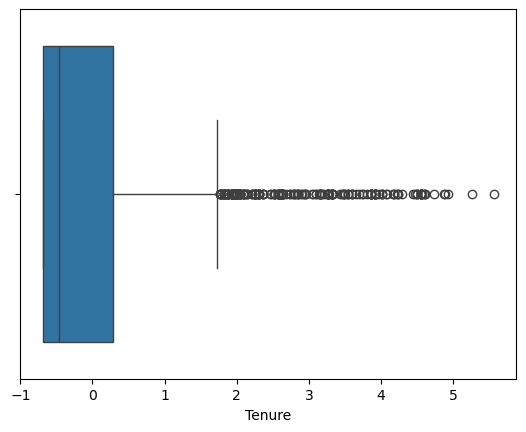

In [43]:
sns.boxplot(x=df1['Tenure'])

In [92]:
df1.head(30)

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Gender,Sa_citizen,Birthyear,Birthmonth,Target,Highest_Education
0,-1.155394,-0.581610,-0.689459,-1.856317,0.840658,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-1.797565,0.878468,0.022311,0.579531,-0.090405,0,0.033586
1,0.889821,0.142476,0.059878,-0.615480,1.320420,0.355036,-0.210777,-0.216506,-1.784873,0.739602,-0.100026,-1.548375,-0.100026,-0.206239,0.878468,0.022311,-1.933152,-0.353186,1,0.033586
2,-0.132786,-2.029782,-0.689459,0.625357,-1.078390,0.355036,-0.210777,-0.216506,0.174491,0.739602,-0.100026,-1.548375,-0.100026,-0.206239,-1.138346,0.022311,-0.334172,0.435158,1,0.033586
3,-1.155394,0.142476,0.731999,0.625357,-1.558153,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,-1.138346,0.022311,0.579531,-1.141531,0,0.033586
4,0.889821,-0.581610,-0.689459,0.625357,0.360896,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,0.878468,0.022311,0.122679,1.749066,0,0.033586
5,0.889821,-0.581610,-0.689459,-1.856317,-0.118866,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,0.878468,0.022311,-0.334172,1.749066,0,0.033586
6,0.889821,0.142476,2.514964,0.625357,0.840658,0.355036,-0.210777,-0.216506,-0.805191,0.739602,-0.100026,1.318062,-0.100026,1.385087,0.878468,0.022311,0.579531,-1.141531,0,0.033586
7,0.889821,0.142476,0.121299,0.625357,0.840658,-2.816617,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,-1.138346,0.022311,-0.105746,-1.141531,0,1.787014
8,0.889821,1.590648,-0.210375,0.625357,-0.118866,0.355036,-0.210777,-0.216506,-1.784873,-0.376883,-0.100026,1.318062,-0.100026,-0.206239,-1.138346,0.022311,0.579531,-1.141531,0,0.033586
9,0.889821,-1.305696,2.572875,-1.856317,0.360896,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,-1.138346,0.022311,-1.476301,-0.353186,1,0.033586


In [44]:
df1['Gender']=df1['Gender'].replace({1:'Female', 0:'Male'})

In [45]:
df1['Matric']=df1['Matric'].replace({1:'Yes', 0:'No'})

In [46]:
df1['Degree']=df1['Degree'].replace({1:'Yes', 0:'No'})

In [47]:
df1['Diploma']=df1['Diploma'].replace({1:'Yes', 0:'No'})

In [48]:
df1['Sa_citizen']=df1['Sa_citizen'].replace({1:'Citizen', 0:'Non-citizen'})

In [49]:
df1['Target']=df1['Target'].replace({1:'Unemployed', 0:'Employed'})

In [50]:
df1

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Gender,Sa_citizen,Birthyear,Birthmonth,Target,Highest_Education
0,-1.155394,-0.581610,-0.689459,-1.856317,0.840658,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-1.797565,0.878468,0.022311,0.579531,-0.090405,Employed,0.033586
1,0.889821,0.142476,0.059878,-0.615480,1.320420,0.355036,-0.210777,-0.216506,-1.784873,0.739602,-0.100026,-1.548375,-0.100026,-0.206239,0.878468,0.022311,-1.933152,-0.353186,Unemployed,0.033586
2,-0.132786,-2.029782,-0.689459,0.625357,-1.078390,0.355036,-0.210777,-0.216506,0.174491,0.739602,-0.100026,-1.548375,-0.100026,-0.206239,-1.138346,0.022311,-0.334172,0.435158,Unemployed,0.033586
3,-1.155394,0.142476,0.731999,0.625357,-1.558153,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,-1.138346,0.022311,0.579531,-1.141531,Employed,0.033586
4,0.889821,-0.581610,-0.689459,0.625357,0.360896,0.355036,-0.210777,-0.216506,0.174491,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,0.878468,0.022311,0.122679,1.749066,Employed,0.033586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0.889821,1.590648,-0.210375,-1.856317,0.360896,0.355036,-0.210777,-0.216506,-0.805191,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,0.878468,0.022311,0.579531,-1.141531,Employed,0.033586
4016,0.889821,0.142476,0.014251,0.625357,-0.598628,0.355036,-0.210777,4.618802,0.174491,-0.376883,-0.100026,1.318062,-0.100026,-0.206239,-1.138346,0.022311,0.351105,-0.615968,Employed,-1.719843
4017,0.889821,0.142476,3.323966,0.625357,-0.118866,-2.816617,-0.210777,-0.216506,-1.784873,-0.376883,-0.100026,-0.115157,-0.100026,-0.206239,0.878468,0.022311,-1.476301,1.223503,Employed,1.787014
4018,-1.155394,-0.581610,-0.689459,0.625357,-1.558153,0.355036,-0.210777,-0.216506,0.174491,1.856087,-0.100026,1.318062,-0.100026,2.976414,0.878468,0.022311,0.579531,-1.141531,Unemployed,0.033586


In [51]:
df1.to_csv('Group Five_data.csv', index= False)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

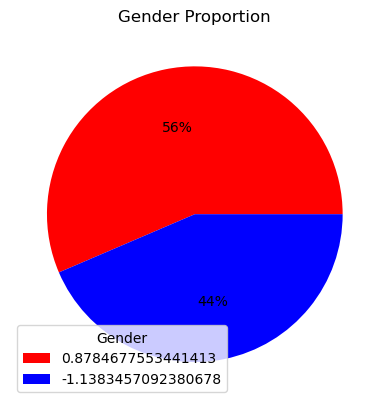

In [53]:
Gender_count= df1['Gender'].value_counts()
plt.pie(Gender_count, colors= ('r','b','g'), autopct='%1.0f%%')
plt.legend(Gender_count.index, title='Gender', loc='best')
plt.title('Gender Proportion')
plt.show()

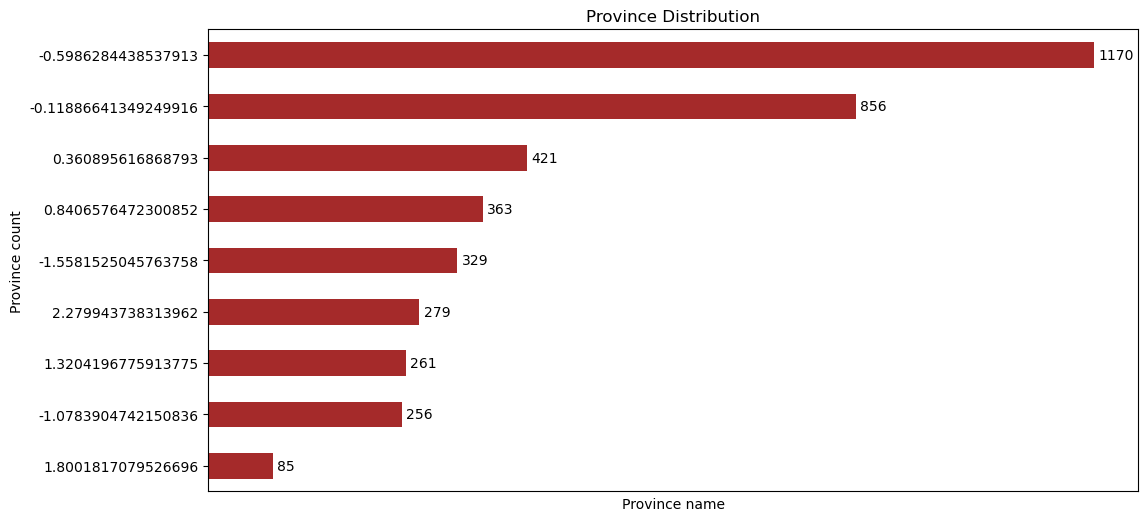

In [54]:
Province_count= df1['Province'].value_counts()
bars= Province_count.sort_values().plot(kind ='barh', color = 'brown', figsize=(12, 6))
plt.ylabel('Province count')
plt.xlabel('Province name')
plt.xticks([])
bars.bar_label(bars.containers[0], padding = 3)
plt.title('Province Distribution')
plt.show()

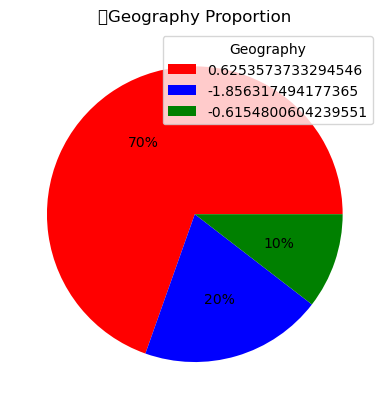

In [55]:
Geography_count= df1['Geography'].value_counts()
plt.pie(Geography_count, colors= ('r','b','g'), autopct='%1.0f%%')
plt.legend(Geography_count.index, title='Geography', loc='best')
plt.title('	Geography Proportion')
plt.show()

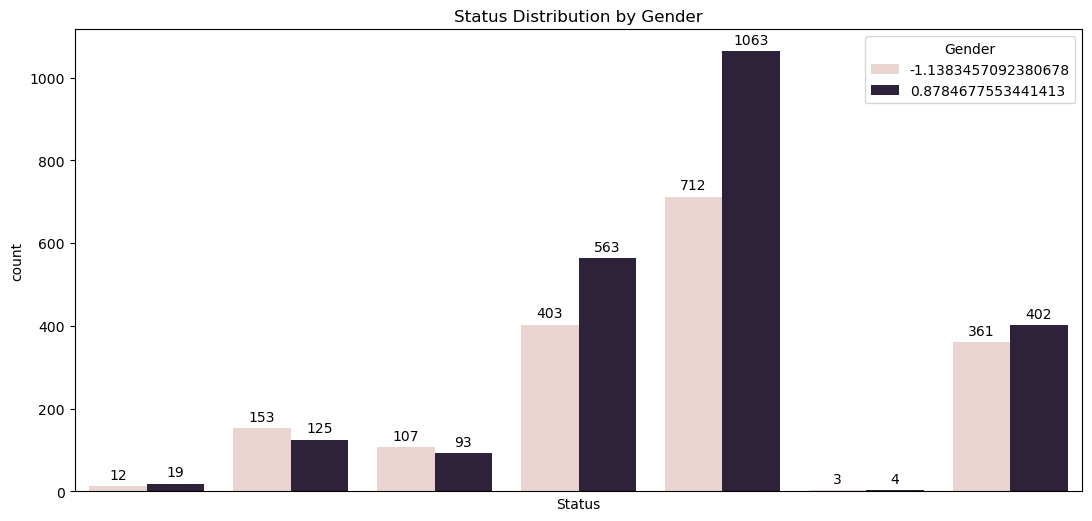

In [56]:
Status_count= df1['Status'].value_counts()
plt.figure(figsize=(13,6))
ax=sns.countplot(data=df1, x='Status', hue='Gender')
ax.set_xticks([])
for container in ax.containers:
    ax.bar_label(container,padding =3,fontsize=10)
plt.title('Status Distribution by Gender')
plt.xlabel('Status')
plt.legend(title='Gender')

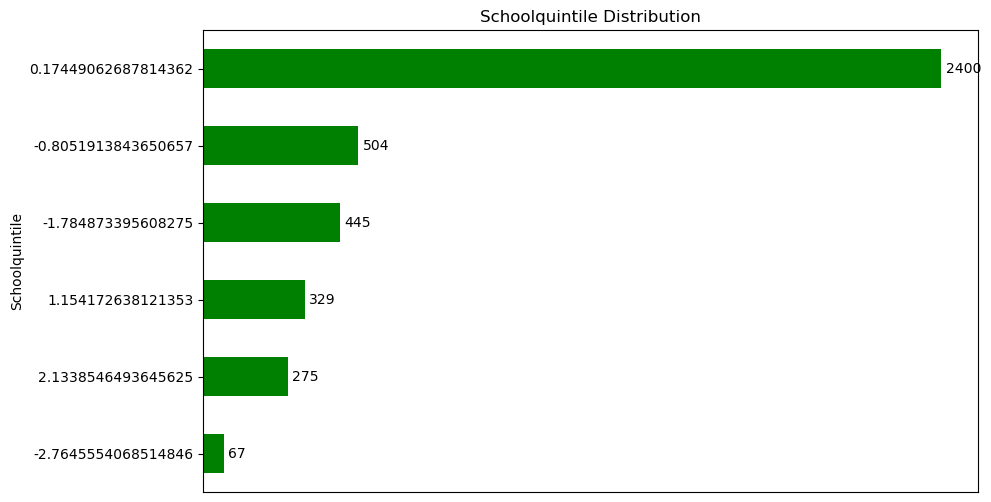

In [57]:
Schoolquintile_count = df1['Schoolquintile'].value_counts()
bars= Schoolquintile_count.sort_values().plot(kind ='barh', color = 'g', figsize=(10, 6))
plt.ylabel('Schoolquintile')
plt.xticks([])
bars.bar_label(bars.containers[0], padding = 3)
plt.title('Schoolquintile Distribution')
plt.show()

## Model Deployment 

In [74]:
import joblib

# Save the trained model
joblib.dump(logistic_model, 'logistic_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the column names used during training
joblib.dump(X_train.columns.tolist(), 'X_columns.pkl')

['X_columns.pkl']